In [ ]:
# Run this cell once when starting on notebook.
# On Google Colab, wait for the Google Drive permission prompts before proceeding
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
try:
    %load_ext jupyter_ai_magics
except:
    print("%%ai cells will not work in this notebook")
    print("Please use Gemini for AI queries instead")
from datascience import *
import numpy as np
import math

DATA_FOLDER="data/"
try:
  from google.colab import drive
  drive.mount('/content/drive', force_remount=True)
  !mkdir -p /content/data
  !gdown --folder https://drive.google.com/drive/folders/1XifjqyxFHvjK6nOUi4doYsG12hGPhOcI?usp=drive_link -O /content/data
  DATA_FOLDER = DATA_FOLDER.replace("data/", "/content/data/")
  !ls -l /content/data
except:
  print("Google Drive not mounted; this is normal on Jupyter Hub")


%%ai cells will not work in this notebook
Please use Gemini for AI queries instead
Mounted at /content/drive
Retrieving folder contents
Processing file 1hOMU36QJH-8E1xMqZqick7tdYPtRqXWc codes.csv
Processing file 1-pQmPDnV44eDEVIOm_dglgktbO1ng7pe data_science_salaries_raw.csv
Processing file 1Cl56p5ygZPsG_TdGagMpd2wxMAnsNUN0 ucsb-f25-courses.csv
Processing file 1A6TJBGq7Fg5eO_4XrHgrRRM27RRxB6w7 ucsb-m25-courses.csv
Processing file 1KqFgPgttI11ADhBdGWipQ4RaCyM7S8iZ ucsb-s25-courses.csv
Processing file 1DHBdvECi_-cQtiJ1FZl4v_JfLgAMrauE world_happiness_2015.csv
Processing file 10lU_ehl4CmZqXZ8Ow4tz_G4zHvB9kkwV world_happiness_2019.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1hOMU36QJH-8E1xMqZqick7tdYPtRqXWc
To: /content/data/codes.csv
100% 6.40k/6.40k [00:00<00:00, 19.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-pQmPDnV44eDEVIOm_dglgktbO1ng7pe
To: /content/da

# Lecture 14, CMPSC 5A, S25

Thu 05/15/2025, Week 7

Google Colab versions of lecture notebooks can be found in this folder:
* <https://drive.google.com/drive/folders/1jS1Fa0BpGUVaijXwIYX0I21Un6XOGQM-?usp=sharing>

Note that the Google Colab version will have any updates made during class, while the copy on Jupyter Hub may not.


# Midterm Project

Any questions about the midterm project?

* For reference, here's a link to the [General Instructions, CS5A S25 Midterm](https://docs.google.com/document/d/1gYMuXukOTtJkEthxUeHmWuA1Qn9BtIYkSJa37Gb524E/edit?usp=sharing)




## ic23 Participation Assignment

Just one today, on Gradescope as [ic23](https://www.gradescope.com/courses/1014383/assignments/6227844)




# Where are we in the reading?

By today, you should have finished reading:

* [Chapter 1: What is Data Science](https://inferentialthinking.com/chapters/01/what-is-data-science.html)
* [Chapter 2 Causality and Experiments](https://inferentialthinking.com/chapters/02/causality-and-experiments.html)
* [Chapter 3: Programming in Python](https://inferentialthinking.com/chapters/03/programming-in-python.html)
* [Chapter 4: Data Types](https://inferentialthinking.com/chapters/04/Data_Types.html)
* [Chapter 5: Sequences](https://inferentialthinking.com/chapters/05/Sequences.html)
* [Chapter 6: Tables](https://inferentialthinking.com/chapters/06/Tables.html)
* [Chapter 7: Visualization](https://inferentialthinking.com/chapters/07/Visualization.html)
* [Chapter 8: Functions and Tables (Intro)](https://inferentialthinking.com/chapters/08/Functions_and_Tables.html)
* [Chapter 9 (intro)](https://inferentialthinking.com/chapters/09/Randomness.html#) - Booleans (`True`, `False`) and comparisons
* [Section 9.1 (Conditional Statements)](https://inferentialthinking.com/chapters/09/1/Conditional_Statements.html#) - `if`/`elif`/`else`
* [Section 9.2 (Iteration)](https://inferentialthinking.com/chapters/09/2/Iteration.html) - loops, for loops, "augmenting arrays" (the *accumulator pattern*)

New Reading for Today (week 7, 05/15)

* Second part of [Chapter 9](https://inferentialthinking.com/chapters/09/Randomness.html#)
  * [Section 9.3 (Simulation)](https://inferentialthinking.com/chapters/09/3/Simulation.html)
  * [Section 9.4 (The Monty Hall Problem)](https://inferentialthinking.com/chapters/09/4/Monty_Hall_Problem.html)
  * [Section 9.5 (Finding Probabilities)](https://inferentialthinking.com/chapters/09/5/Finding_Probabilities.html)



*New Reading for next Tuesday (week 8, 05/20):*

Don't worry that these first four are slightly out of order; they are relatively simple and don't depend on material from earlier chapters.  

This textbook was intended for a 15 week semester course, and we only have 10 weeks; I want to make sure that you don't miss out on the most important concepts.

* [Chapter 14 (intro, Why the Mean Matters)](https://inferentialthinking.com/chapters/14/Why_the_Mean_Matters.html)
* [Section 14.1, (Properties of the Mean)](https://inferentialthinking.com/chapters/14/1/Properties_of_the_Mean.html)
* [Section 14.2, (Variability)](https://inferentialthinking.com/chapters/14/2/Variability.html)
* [Section 15.1, (Correlation)](https://inferentialthinking.com/chapters/15/1/Correlation.html)

*New Reading for next Thursday (week 8, 05/22):*

* [Chapter 10 (Sampling and Empirical Distributions)](https://inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html)

*New Reading for Tuesday (week 9, 05/27):*

* [Chapter 11 (Testing Hypotheses, including p-values)](https://inferentialthinking.com/chapters/11/Testing_Hypotheses.html)

New Reading for Thursday (week 9, 05/29):
* [Chapter 12 (Comparing Two Samples, including A/B testing)](https://inferentialthinking.com/chapters/11/Testing_Hypotheses.html)

Unless I update you otherwise, this is all the reading for the quarter.



# An introduction to Correlation

## Why are we skipping ahead to [Section 15.1, (Correlation)](https://inferentialthinking.com/chapters/15/1/Correlation.html) in the reading?

The textbook we are using is designed for a 15 week semester, not a 10 week quarter.  So we won't be able to cover *all* of the interesting statistics content.  

If you want the rest of it, I'll be offering CMPSC 5B, which is the follow on to this course, in Spring 2026.

So, we have to "pick and choose" what topics to cover, knowing that many of you may not have the opportunity or the interest in taking another 10 week course in Data Science.

So: I've decided that two most important things I want you to understand are:
* correlation
* p-values

So, we'll be skipping around a bit in the reading; that's why I'm asking you to read [Section 15.1, (Correlation)](https://inferentialthinking.com/chapters/15/1/Correlation.html) out of order.  You will need this for lab05 which is being assigned next Wednesday after you finish the midterm project.

**_Don't worry that it's out of order; it doesn't depend on any content we haven't already covered_**.  In addition, I'll be going over what you need to know in lecture today.



### Mean, Variance, Standard Deviation

When we talk about correlation, we are going to mention the Pearson Correlation Coefficient.

And while we are not necessarily going to need all of the deep math behind it for what we're doing in this course, I want to at least *show* you the math so that if you *want* to go deeper you can.

The formula for the Pearson Correlation Coefficient uses a few things we haven't formally defined yet, so it's time to do that:

* Mean
* Variance
* Standard Deviation

You'll read more about these in this reading for next Tuesday:

* [Chapter 14 (intro, Why the Mean Matters)](https://inferentialthinking.com/chapters/14/Why_the_Mean_Matters.html)
* [Section 14.1, (Properties of the Mean)](https://inferentialthinking.com/chapters/14/1/Properties_of_the_Mean.html)
* [Section 14.2, (Variability)](https://inferentialthinking.com/chapters/14/2/Variability.html)

*Mean* is just the average: the sum of all of the values, divided by the number of values.  Mean is typically represented one of two ways:

| Population Mean | Sample Mean |
|---------------------|----------------|
| $ \mu $ (greek letter mu) | $ \bar{x} $ (bar x) |


We'll go into this more later, but for now:
* Population is used when have access to the entire population under study
* Sample is used when you are taking a sample of that population

*Variance* tells you how much a set of numbers differs from the average, and is typically represented as

| Population Variance | Sample Variance |
|---------------------|----------------|
| $ \sigma^2 $ (sigma squared) | $ s^2 $ (s squared) |


* When variance is low, tend to be closer to the average
* When it's high, the numbers tend to be farther from the average

The formula for variance has two forms:

| Population Variance (access to entire population)  | Sample Variance (access to only a sample)   |
|--------------------------------------------------|-------------------------------------------------------|
| $ \sigma^2 = \frac{1}{n}\sum_{i=1}^{n}{(x_i-\mu)^2} $ | $ s^2 = \frac{1}{n - 1}\sum_{i=1}^{n}{(x_i-\bar{x})^2} $ |


What this notation means is:
* Take each value, determine how far it is from the mean (or sample mean), and then square the result.
* Add up all of those results
* Divide by n or n-1 (depending whether it's a population variance or a sample variance)

(If you want to know *why* that's the formula, the PSTAT 120A/120B/120C faculty would be happy to explain it; in this lower division data science, we just take it on faith.)

You'll notice that the symbols we use for variance, $ \sigma^2 $  or  $ s^2 $, have a "squared" in them.   

That's because $s$ or $\sigma$ represents something called *standard deviation*.  

| Population Standard Deviation | Sample Standard Deviation |
|---------------------|----------------|
| $ \sigma $ (sigma) | $ s $  |



Standard deviation is simply the square root of the variance:

| Population Standard Deviation (access to entire population)  | Sample Standard Deviation (access to only a sample)   |
|--------------------------------------------------|-------------------------------------------------------|
| $ \sigma = \sqrt{\frac{1}{n}\sum_{i=1}^{n}{(x_i-\mu)^2}} $ | $ s = \sqrt{\frac{1}{n - 1}\sum_{i=1}^{n}{(x_i-\bar{x})^2}} $ |


To summarize the conventions for these numbers, we have:
There are conventions for how we refer to these variables:
- For population parameters, we use Greek letters.
- For sample estimates, we use English letters.

| Measure.       | Population Parameter | Pronounced |  Estimator | Pronounced |
|----------------|-------------------------------|------------|-----------------------|------------|
| Mean (Average) |   $ \mu $ |  mu |$ \bar{x} $ |  x bar     |
| Variance |   $ \sigma^2 $ |  sigma squared |$ s^2 $ |  s squared    |
| Standard Deviation |   $ \sigma $ |  sigma  |$ s $ |  s     |


## The [World Happiness Dataset from Kaggle.com](https://www.kaggle.com/datasets/unsdsn/world-happiness)

The website [kaggle.com](https://www.kaggle.com) has a variety of datasets to explore.

I asked Chatgpt this question:

> What are some good datasets on kaggle to explore Pearson correlation?

This is one of the three it suggested (you can explore the others if you like).

Here's a few points from the description of this dataset on Kaggle:

* First Published in 2012; Kaggle has data for 2015 through 2019. We'll look at 2015.
* Ranks 155 countries and their happiness levels.
* "Leading experts across fields—economics, psychology, survey analysis, national statistics, health, public policy and more—describe how measurements of well-being can be used effectively to assess the progress of nations."

* "The happiness scores and rankings use data from the Gallup World Poll."
* "The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale"

I want to emphasize this next point, since we're going to be talking more about sampling in the upcoming lectures.  I don't want to get too distracted by this, becuase today's lecture is about Correlation, but I do want to plant some seeds and get you thinking about what this statement means:

* "The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative."

What do you think it means to use "weights" to make estimates "representative"?

Think about that, and we'll return to it in a future lecture.

* "The columns following the happiness score estimate the extent to which each of six factors ... contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors."
* The six factors are:
  * economic production
  * social support
  * life expectancy
  * freedom
  * absence of corruption
  * and generosity
* "[The six factors] have no impact on the total score reported for each country, but they do explain why some countries rank higher than others."

That's what we'll exploring today: the *correlations* between and among six factors, and the overall happiness score.

There are a few other details about the Happiness dataset that we'll come back to later, but that's enough for now.

Remember that *correlation does not imply causation*.
* Causation means *a causes b*, *b happens because of a*.
* Correlations simply means *when we see a we also see b*, and vice-versa.

We can also observe:
* Causation is directional.
* Correlations is symmetrical.

For example:

* If we observe that lung cancer and smoking are *correlated* it means that in a population
  * whenever we see that an individual is (or has been) a smoker, it's more  likely that they may have (or have had) lung cancer, _**AND**_
  * whenever we see that an individual has (or has had) lung cancer, it's more likely that they are (or were) a smoker.
  * the more highly correlated they are, the more often they occur together, and the less often the occur separately.
  * It goes both ways; it's symmetrical.  The math even shows that; we get the same number either way.
  * To say that lung cancer and smoking are  *correlated*  means exactly the same thing as saying that smoking and lung cancer are correlated.
* BUT, if we say that smoking *causes* lung cancer, that's directional.  
  * It doesn't mean the same thing to say that lung cancer *causes* smoking.
  * The direction *matters*.


And: if two things are hightly correlated, it just means that they *tend* to occur together more often than not.  

But it *cannot* tell us, alone, which one *causes* the other.  For that, we need more information.  (But that's for another lecture; today, we'll just focus on correlations).

## The Pearson Correlation Coefficient

The measure of correlation is called the *Pearson Correlation Coefficient*.

I want to briefly mention the math, though we will not go into the math in this course (if you want to understand the math, PSTAT 120A/120B/120C is the course sequence that explores that.)

The input to a correlation calculation is a set of (x,y) pairs.  Think of these a points on a scatter plot such as this one from our textbook, which shows data about cars.  

On the x axis, you see `msrp`, which is "manufacturer’s suggested retail price in 2013 dollars".   

On the y axis, you see `acceleration`, i.e. acceleration rate in km per hour per second.

In plain english, we are looking at the association between price and how fast a car can accelerate.  


* Are cars that can accelerate quickly more expensive, and
* Do expensive cars accelerate faster?

Remember that correlation is always symmetrical, bi-directional.



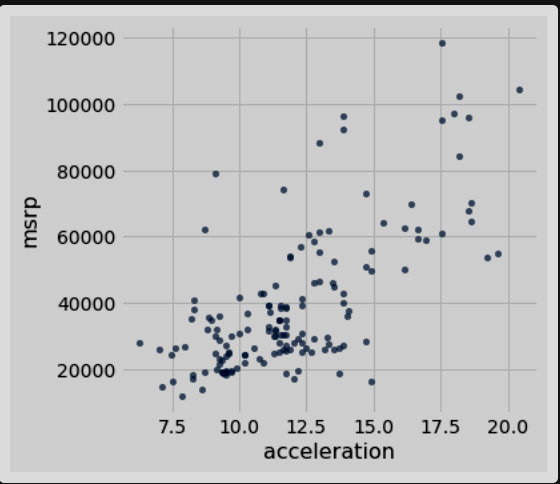




So, suppose we have all of the $(x,y)$ pairs represented by this scatter plot.

And in addition, we can calculate:

* $\mu_x$ = mean of all of the $x$ values
* $\mu_y$ = mean of all of the $y$ values
* $\sigma_x$ = standard deviation of all of the $x$ values
* $\sigma_y$ = standard deviation of all of the $y$ values

Then: the formula for correlation is:

$ r = \frac{\sum{(x - \mu_x)(y - \mu_y)}}{\sigma_x \sigma_y} $

Or, on one line: r = Σ((x - μₓ)(y - μᵧ)) / (σₓσᵧ)

That is:
* For each $(x,y)$ pair
  * We take x minus the mean of the x values
  * We take y minus the mean of the y values
  * We multiply those together
* We add up all of those values, and divide by the product of the standard deviations of x and y.

(Just like with variance: if you want to know *why* that's the formula, the PSTAT 120A/120B/120C faculty would be happy to explain it; in this lower division data science, we just take it on faith.)

What this gives us is a number between -1 and 1, with the following interpretation:

* +1: Perfect positive correlation: as one goes up, the other goes up
* -1: Perfect negative correlation: as one goes up, the other goes down
* 0: No correlation

We can go a step further, and use this table to interpret the results:

The following table shows how we can interpret the results:

| Correlation Coefficient (r) | Strength & Direction         |
|-----------------------------|-------------------------------|
| +1.0                        | Perfect positive correlation  |
| +0.7 to +0.9                | Strong positive correlation   |
| +0.4 to +0.6                | Moderate positive correlation |
| +0.1 to +0.3                | Weak positive correlation     |
| 0                           | No correlation                |
| -0.1 to -0.3                | Weak negative correlation     |
| -0.4 to -0.6                | Moderate negative correlation |
| -0.7 to -0.9                | Strong negative correlation   |
| -1.0                        | Perfect negative correlation  |




# But fortunately, we can just use `np.corrcoef()`

Fortunately, we don't really need to implement the details of this mathematical formula;  `numpy` will compute this for us with this function:


```
np.corrcoef(array_x, array_y)
```

where `array_x` and `array_y` contain the $(x,y)$ values.

Let's apply that to our Happiness Data set as an example.

## Loading the 2015 Happiness Dataset

Datasets are available for 2015 through 2019 at <https://www.kaggle.com/datasets/unsdsn/world-happiness>; I've uploaded 2015 and 2019 data into our data folders.  We'll look at 2015 data today, but the 2019 data is there if you want to explore it on your own.


In [ ]:
happiness_raw = Table.read_table(DATA_FOLDER + "world_happiness_2015.csv")
happiness_raw

Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2.70201
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,Western Europe,4,7.522,0.0388,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
Finland,Western Europe,6,7.406,0.0314,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.4761,2.4657
Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.6598,0.43844,0.36262,2.37119
New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


Let's start by relabelling some of these categories to make them easier to work with, since these labels are a bit long to type:

In [ ]:
happiness = happiness_raw \
  .relabel("Happiness Rank","Rank")  \
  .relabel("Happiness Score", "Score") \
  .relabel("Standard Error", "Error") \
  .relabel("Economy (GDP per Capita)", "Economy") \
  .relabel("Health (Life Expectancy)", "Health") \
  .relabel("Trust (Government Corruption)", "Trust") \
  .relabel("Dystopia Residual", "Dystopia")
happiness

Country,Region,Rank,Score,Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2.70201
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,Western Europe,4,7.522,0.0388,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
Finland,Western Europe,6,7.406,0.0314,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.4761,2.4657
Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.6598,0.43844,0.36262,2.37119
New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


Ok, that's a bit easier to work with!  Now let's make some scatter plots.

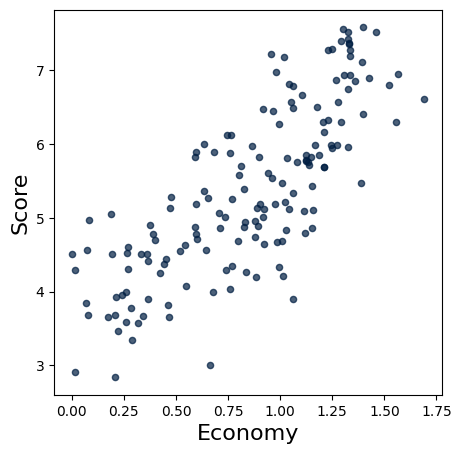

In [ ]:
# Uncomment  "%matplotlib inline" and run it again if graphs are not showing up;
# Rerun the cell if you get multiple graphs stacked up

%matplotlib inline
happiness.scatter("Economy","Score")

That looks like a pretty clear relationship!  You can see that the points are clustered around a line that goes up and to the right; as the Economy score goes up, so does Happiness.  Let's try a few more:

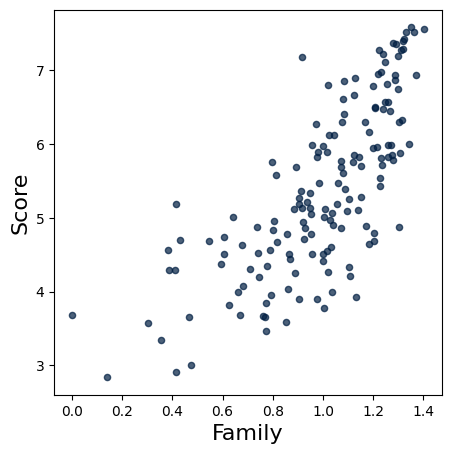

In [ ]:
happiness.scatter("Family","Score")

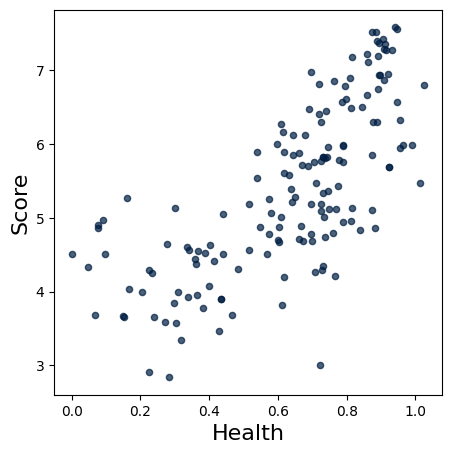

In [ ]:
happiness.scatter("Health","Score")

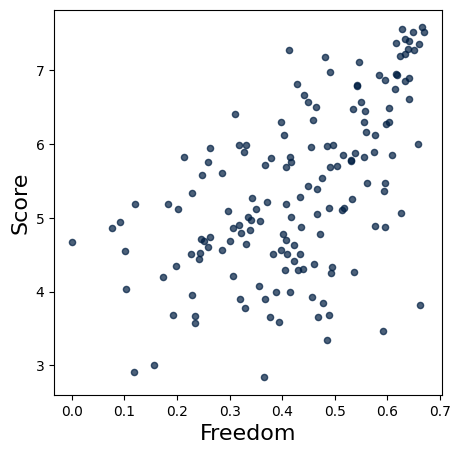

In [ ]:
happiness.scatter("Freedom","Score")

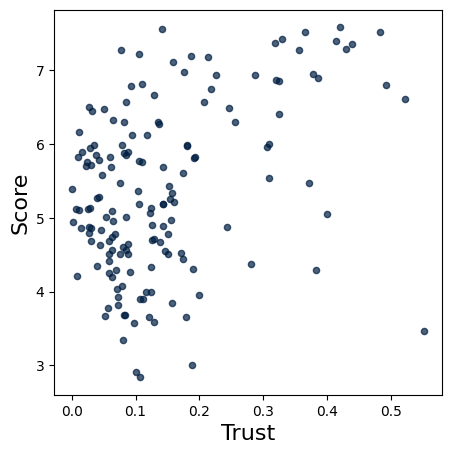

In [ ]:
happiness.scatter("Trust","Score")

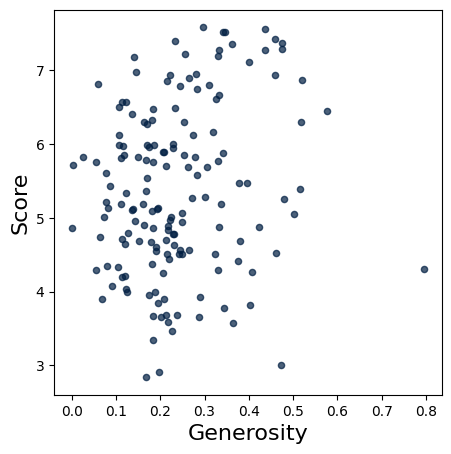

In [ ]:
happiness.scatter("Generosity","Score")

As we look at these, they all seem to be vaguely correlated.  

But how can we measure how strong each of these correlations are so that we can compare them?  Our eyes may not be a reliable measure of that, but see if you can form a hypothesis about which two of these are the strongest:

* Economy
* Family
* Health
* Freedom
* Trust
* Generosity


Now we'll do the calculations!

Let's start by just doing the calculation on Economy.  To remind you, here's the scatter plot:

In [ ]:
happiness.scatter("Economy","Score")

And here's how we calculated the Pearson Coefficient.  We first need to pull out the variables into `numpy` arrays:


In [ ]:
economy = np.array(happiness.column("Economy"))
score = np.array(happiness.column("Score"))

Then, we calculate the Persaon Correlation:

In [ ]:
economy_vs_score = np.corrcoef(economy, score)
economy_vs_score

array([[ 1.        ,  0.78096553],
       [ 0.78096553,  1.        ]])

The output we get back may be a bit confusing, because it comes back as a 2x2 matrix.

The actual pearson coefficient is in position `[0][1]` and `[1][0]`.  The reason is that we specified two variables, and what we are getting back is actually the coefficients for every combination of those, including comparing each variable with itself (which, obviously, has a correlation of 1.0).

We can also specify three or more variables, but to do that, we need to structure things a bit differently.  Here's an example with three variables:


In [ ]:
economy = np.array(happiness.column("Economy"))
family = np.array(happiness.column("Family"))
score = np.array(happiness.column("Score"))

three_data_sets = np.array([economy, family, score])
three_way_correlation = np.corrcoef(three_data_sets)
three_way_correlation

array([[ 1.        ,  0.64529939,  0.78096553],
       [ 0.64529939,  1.        ,  0.7406052 ],
       [ 0.78096553,  0.7406052 ,  1.        ]])


Here's how to interpret the data:

|         | economy         | family         | score          |
|---------|-----------------|----------------|----------------|
| economy | economy,economy | economy,family | economy, score |
| family  | family,economy  | family,family  | family, score  |
| score   | score,economy | score,family   | score, score   |


From these three variables, what is the strongest correlation?

Excludig the `1.` values for a variable with itself, we see that they rank as follows:

| Pairing | Correlation |
|---------|-------------|
| economy, score | 0.78096553 |
| family, score |  0.7406052   |
| economy, family | 0.64529939 |

We can extend this to all of our variables like this:

In [ ]:
economy = np.array(happiness.column("Economy"))
family = np.array(happiness.column("Family"))
score = np.array(happiness.column("Score"))
health = np.array(happiness.column("Health"))
freedom = np.array(happiness.column("Freedom"))
trust = np.array(happiness.column("Trust"))
generositty = np.array(happiness.column("Generosity"))

data_all = np.array([economy, family, score, health, freedom, trust, generositty])
all_ways_correlation = np.corrcoef(data_all)
all_ways_correlation

array([[ 1.        ,  0.64529939,  0.78096553,  0.816478  ,  0.37029971,
         0.3078852 , -0.01046544],
       [ 0.64529939,  1.        ,  0.7406052 ,  0.53110399,  0.44151821,
         0.20560511,  0.08751324],
       [ 0.78096553,  0.7406052 ,  1.        ,  0.7241996 ,  0.5682109 ,
         0.39519858,  0.18031853],
       [ 0.816478  ,  0.53110399,  0.7241996 ,  1.        ,  0.36047653,
         0.24833468,  0.10833522],
       [ 0.37029971,  0.44151821,  0.5682109 ,  0.36047653,  1.        ,
         0.49352352,  0.37391613],
       [ 0.3078852 ,  0.20560511,  0.39519858,  0.24833468,  0.49352352,
         1.        ,  0.2761227 ],
       [-0.01046544,  0.08751324,  0.18031853,  0.10833522,  0.37391613,
         0.2761227 ,  1.        ]])

This output can be a bit tough to understand because it's so messy, especially the way that Jupyter Notebooks might "wrap around" when the code gets too wide for the screen.

Here's a function definition that makes things a bit easier.

It's called `calculate_correlation_table` and takes two arguments:
* A table
* A list of column names (as strings)

It returns two results:
* The matrix of Pearson Correlation Coefficients
* A table of the results, sorted in descending order by correlation.

It doesn't include correlations of columns with themselves, and it only includes each correlation once (i.e. if (a,b) is included, (b,a) is ommited.)

In [ ]:
def calculate_correlation_table(table, variable_names):

  # First make a list of all the data we are going to pass to np.corrcoef

  data_list = []
  for name in variable_names:
    data_list.append(np.array(table.column(name)))
  data_array = np.array(data_list)

  # Calculate the Pearson Coefficient matrix
  all_ways_correlation = np.corrcoef(data_array)

  # Make a list of dictionaries that we will use to construct a table
  correlation_table_rows = [] # start with empty list
  n = len(variable_names)  # n is the number of variables
  for i in range(n):       # iterate 0 .. n-1
    for j in range(i):     # iterate 0 to i (avoids listing a,b and b,a)
      if i == j:           # don't include self correlation
        continue           # continue "skips" to next iteration of the loop
      # construct one row of the table as a Python dictionary
      this_row = {
          "variable1": variable_names[i],
          "variable2": variable_names[j],
          "correlation": all_ways_correlation[i][j]
      }
      correlation_table_rows.append(this_row) # add to the list

  # Create a table from the list of dictionaries and sort
  correlation_table = Table.from_records(correlation_table_rows) \
    .sort("correlation",descending=True)
  # return both results
  return all_ways_correlation, correlation_table


Let's try out this function

In [ ]:
# efs is Economy, Family, Score
matrix_efs, table_efs = calculate_correlation_table(happiness, ["Economy", "Family", "Score"])

In [ ]:
matrix_efs

array([[ 1.        ,  0.64529939,  0.78096553],
       [ 0.64529939,  1.        ,  0.7406052 ],
       [ 0.78096553,  0.7406052 ,  1.        ]])

In [ ]:
table_efs

correlation,variable1,variable2
0.780966,Score,Economy
0.740605,Score,Family
0.645299,Family,Economy


Now let's try it on the entire dataset:

In [ ]:
happiness.labels

('Country',
 'Region',
 'Rank',
 'Score',
 'Error',
 'Economy',
 'Family',
 'Health',
 'Freedom',
 'Trust',
 'Generosity',
 'Dystopia')

In [ ]:
matrix_all, table_all = calculate_correlation_table(happiness, ["Economy", "Family", "Health", "Freedom", "Trust", "Generosity", "Score"])

In [ ]:
table_all.show()

correlation,variable1,variable2
0.816478,Health,Economy
0.780966,Score,Economy
0.740605,Score,Family
0.7242,Score,Health
0.645299,Family,Economy
0.568211,Score,Freedom
0.531104,Health,Family
0.493524,Trust,Freedom
0.441518,Freedom,Family
0.395199,Score,Trust


# Another way to calculate the Pearson Coefficient: scipy.stats

In this course, so far, we've been using:
* the `datascience` module from UC Berkeley's Data 8 course
* `numpy` a module for Numerical Python

There's another useful module called `scipy` that has a submodule `scipy.stats`.

I'm going to show you that `scipy.stats` can also be used to calculate the Pearson Cofficient.

There's a reason, but it may not be apparent until this coming Tuesday.


```
  import scipy.stats
  economy = np.array(happiness.column("Economy"))
  score = np.array(happiness.column("Score"))
  r = scipy.stats.pearsonr(economy, score)
  print(f"r={r:6.3f}")
```

In [ ]:
import scipy.stats

def calculate_correlation(table, variable_name_x, variable_name_y):
  x = np.array(table.column(variable_name_x))
  y = np.array(table.column(variable_name_y))
  r,p = scipy.stats.pearsonr(x, y)
  print(f"Correlation between {variable_name_x:10} and {variable_name_y:10} is r={r:9.6f}")
  return r

print("---")
calculate_correlation(happiness, "Health", "Economy")
calculate_correlation(happiness, "Score", "Economy")
calculate_correlation(happiness, "Score", "Family")
calculate_correlation(happiness, "Score", "Health")
calculate_correlation(happiness, "Family", "Economy")
print("---")

---
Correlation between Health     and Economy    is r= 0.816478
Correlation between Score      and Economy    is r= 0.780966
Correlation between Score      and Family     is r= 0.740605
Correlation between Score      and Health     is r= 0.724200
Correlation between Family     and Economy    is r= 0.645299
---


For comparison, let's see those numbers from our previous calculation

In [ ]:
table_all.show(5)

correlation,variable1,variable2
0.816478,Health,Economy
0.780966,Score,Economy
0.740605,Score,Family
0.7242,Score,Health
0.645299,Family,Economy


Now: what happens if we try this on a much smaller data set?  Our correlations are based on 158 data points:

In [ ]:
happiness.num_rows

158

But what if they were based on far fewer?   
* Would we still see correlations?
* Could we draw strong conclusions?
* Would those conclusions be valid?

## Strength vs. Significance

We can see that some of these numbers fall into the category of "Strong positive correlation, because they are between 0.7 and 0.9.

But: it's possible to get strong correlation with just a few data points, and when that happens, it's possible that it's just *a freak accident*.

Consider for example, what happens if we run a similar calculation, but on a very small sample of countries.



In [ ]:
sample_10 = happiness.sample(10)

print("---")
calculate_correlation(sample_10, "Health", "Economy")
calculate_correlation(sample_10, "Score", "Economy")
calculate_correlation(sample_10, "Score", "Family")
calculate_correlation(sample_10, "Score", "Health")
calculate_correlation(sample_10, "Family", "Economy")
print("---")

---
Correlation between Health     and Economy    is r= 0.611687
Correlation between Score      and Economy    is r= 0.837244
Correlation between Score      and Family     is r= 0.823917
Correlation between Score      and Health     is r= 0.775083
Correlation between Family     and Economy    is r= 0.726926
---


Let's compare against the whole data set:

In [ ]:
def calculate_correlation(table, variable_name_x, variable_name_y, sample_size):
  x = np.array(table.column(variable_name_x))
  y = np.array(table.column(variable_name_y))
  r,p = scipy.stats.pearsonr(x, y)

  sample = table.sample(sample_size)
  x_sample = np.array(sample.column(variable_name_x))
  y_sample = np.array(sample.column(variable_name_y))
  r_sample,p_sample = scipy.stats.pearsonr(x_sample, y_sample)

  print(f"Correlation between {variable_name_x:10} and {variable_name_y:10} whole data set: r={r:9.6f} sample of size {sample_size:3}  r_sample={r_sample:9.6f} ")

print("---")
calculate_correlation(happiness, "Health", "Economy", 10)
calculate_correlation(happiness, "Score", "Economy", 10)
calculate_correlation(happiness, "Score", "Family", 10)
calculate_correlation(happiness, "Score", "Health", 10)
calculate_correlation(happiness, "Family", "Economy", 10)
print("---")

---
Correlation between Health     and Economy    whole data set: r= 0.816478 sample of size  10  r_sample= 0.924132 
Correlation between Score      and Economy    whole data set: r= 0.780966 sample of size  10  r_sample= 0.780537 
Correlation between Score      and Family     whole data set: r= 0.740605 sample of size  10  r_sample= 0.559207 
Correlation between Score      and Health     whole data set: r= 0.724200 sample of size  10  r_sample= 0.687798 
Correlation between Family     and Economy    whole data set: r= 0.645299 sample of size  10  r_sample= 0.829192 
---


This code illustrates a few things:

* We can still do correlations calculation on small numbers of data points.
* Sometimes those correlations will seem to be very strong!
* BUT: those might be the result of random chance
* AND: the smaller the sample, they more they might deviate from a larger sample.

We are going to explore this more next Tuesday.

Also: we see the power of *simulation* which is discussed in your book in the reading for today.

